In [1]:
import itur
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="times",font_scale=1.6,style="ticks")
plt.rcParams['text.usetex'] = True
import pandas as pd
from scipy.interpolate import interp1d
%config InlineBackend.figure_formats = {'png', 'retina'}

/Users/shotamiyazaki/.pyenv/versions/3.9.5/lib/python3.9/site-packages/itur/models/itu676.py:300: RuntimeWarning: The approximated method to compute the gaseous attenuation in recommendation ITU-P 676-11 is only recommended for elevation angles between 5 and 90 degrees
  warnings.warn(
/Users/shotamiyazaki/.pyenv/versions/3.9.5/lib/python3.9/site-packages/itur/models/itu618.py:471: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(3.86 * (x**2 + 1)**(11. / 12) *


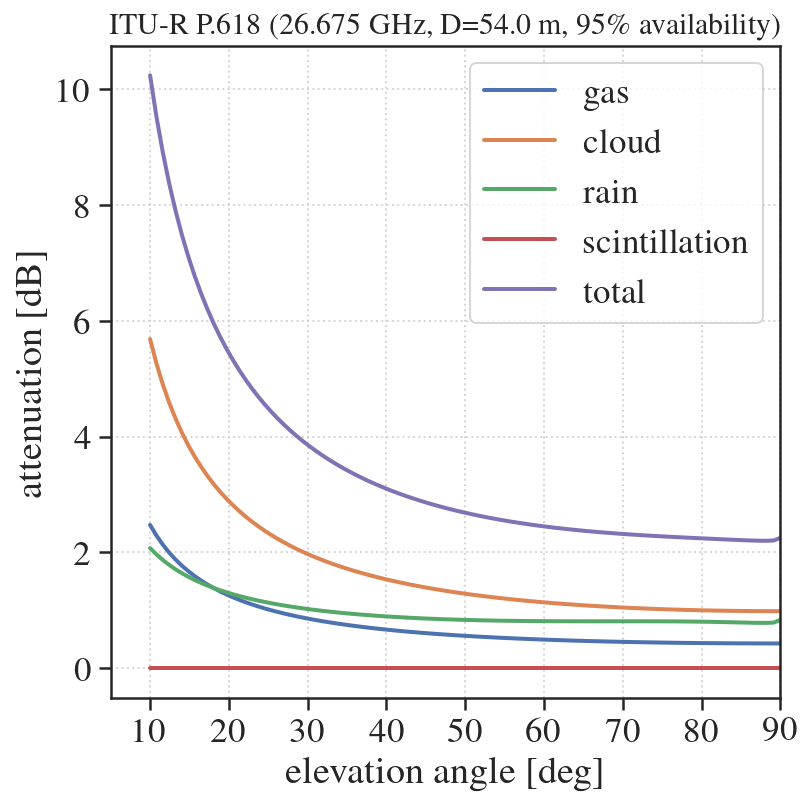

In [33]:
# JWST position in 
FILE = np.load("./JWST_time_ra_dec_delta_alt.npy")
# Ground station coordinates (Misasa)
lat_GS,lon_GS = 36.13,138.35
# Ground station coordinates (White Sands)
#lat_GS,lon_GS =32.943242, -106.419531

# Vectorize the elevation angle
el = np.linspace(10, 90, 100)

f = 26.675 * u.GHz    # Link frequency
D = 54 * u.m       # Antenna diameters for Misasa
#D = 18 * u.m       # Antenna diameters for Misasa

p = 5              # Unavailability (Values exceeded 1% of time)
Att = itur.atmospheric_attenuation_slant_path(lat_GS, lon_GS, f, el, p, D)
Att_cont = itur.atmospheric_attenuation_slant_path(lat_GS, lon_GS, f, el, p, D,return_contributions=True)
#A_gas, A_cloud, A_rain, A_scinti, A_total
plt.figure(figsize=(6,6))
#plt.plot(el, Att.value)
plt.plot(el, Att_cont[0].value,lw=2)
plt.plot(el, Att_cont[1].value,lw=2)
plt.plot(el, Att_cont[2].value,lw=2)
plt.plot(el, Att_cont[3].value,lw=2)
plt.plot(el, Att_cont[4].value,lw=2)
plt.legend(["gas","cloud","rain","scintillation","total"])
plt.title(r"ITU-R P.618 (%s, D=%s, %s"%(f,D,100-p)+"\\%"+" availability)",fontsize=15)
plt.xlabel('elevation angle [deg]')
plt.ylabel('attenuation [dB]')
plt.grid(which='major', linestyle=':',alpha=.8)
plt.xticks(np.arange(0,100,10))
plt.xlim(5,90)
plt.show()

In [35]:
# elevation
#el_JWST = np.where(FILE[-1]>10,FILE[-1],-10) # discard theta<10deg
el_JWST = np.where(FILE[-1]>15,FILE[-1],-10) # discard theta<15deg
Att = itur.atmospheric_attenuation_slant_path(lat_GS, lon_GS, f, el_JWST, p, D)
Att2 = np.where(np.isinf(Att.value),np.nan,Att.value)

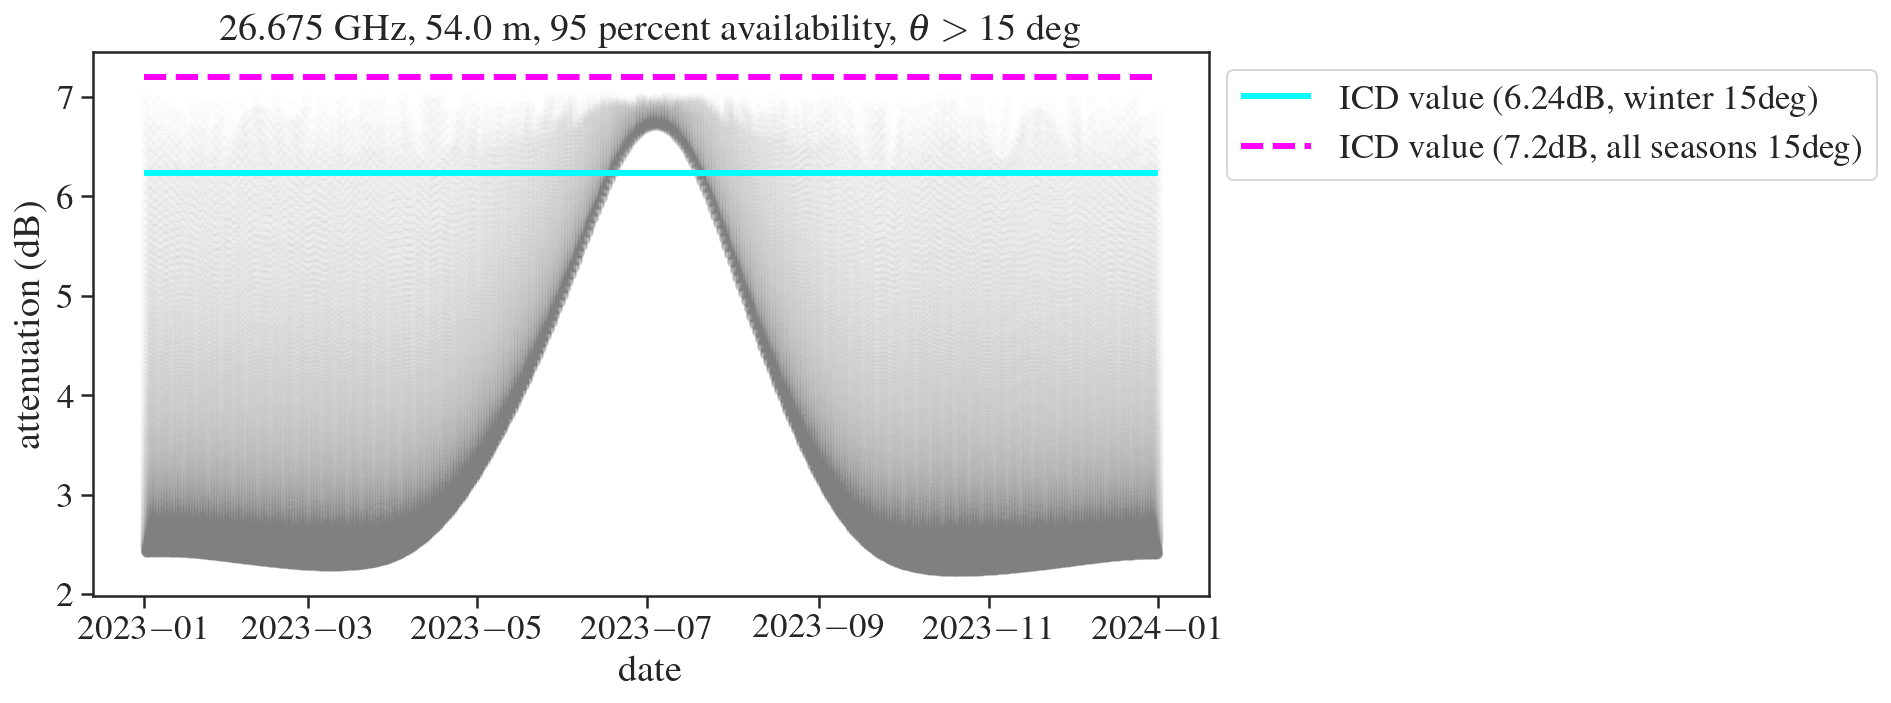

In [36]:
from astropy.time import Time
t = Time(FILE[0],format="jd")
Att_model = interp1d(t.value,Att2)
plot_range = np.arange(np.min(t.value),np.max(t.value),0.001)
att_plot   = Att_model(plot_range)

fig,ax=plt.subplots(figsize=(10,5))
plt.hlines(6.24,np.min(t.to_datetime()),np.max(t.to_datetime()),zorder=3,color="cyan",ls="-",lw=3)
plt.hlines(7.2,np.min(t.to_datetime()),np.max(t.to_datetime()),zorder=3,color="magenta",ls="--",lw=3)
plt.legend(["ICD value (6.24dB, winter 15deg)","ICD value (7.2dB, all seasons 15deg)"],bbox_to_anchor=(1,1,))
#plt.hist2d(Time(plot_range,format="jd").to_datetime(),att_plot)
#plt.plot(Time(plot_range,format="jd").to_datetime(),att_plot,color="k",alpha=.6)
plt.scatter(Time(plot_range,format="jd").to_datetime(),att_plot,color="gray",alpha=0.01,s=20)
plt.ylabel("attenuation (dB)")
plt.xlabel("date")
plt.title("%s, %s, %s percent availability, $\\theta>15$ deg"%(f,D,100-p))
ax.yaxis_inverted()

plt.show()

/Users/shotamiyazaki/.pyenv/versions/3.9.5/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


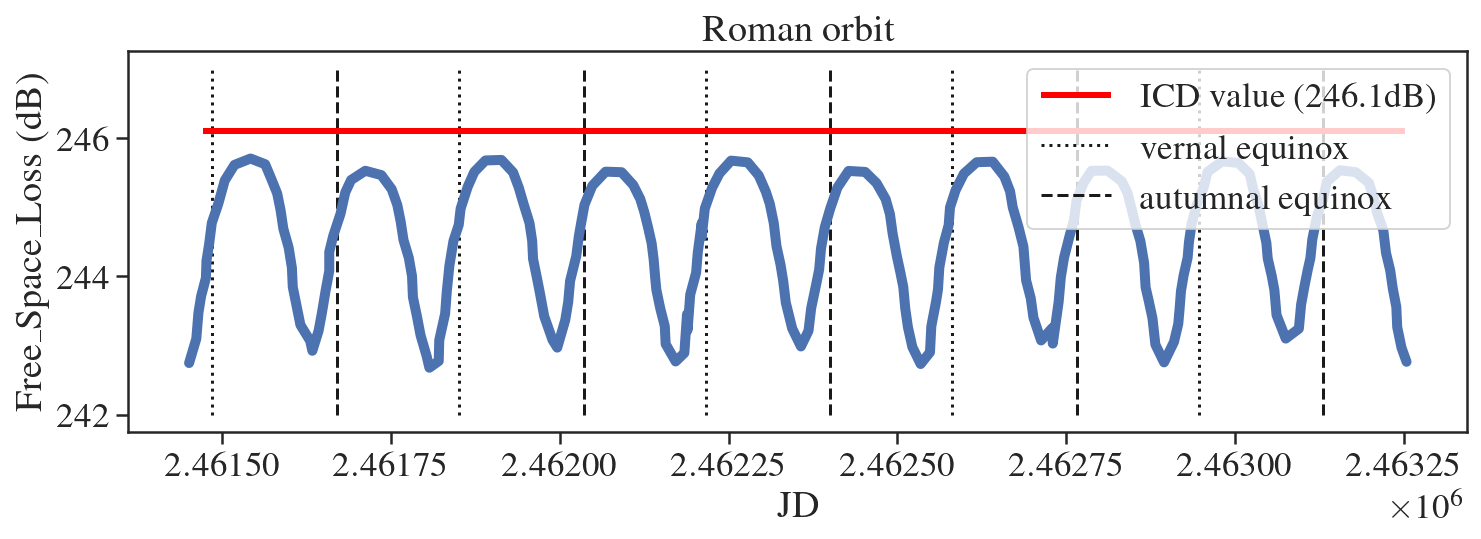

In [37]:
RO = pd.read_csv("./Roman_orbit.csv",header=None,names=["jd","distance"])
time_r = Time(RO.jd+2450000,format="jd")
GHz = 26.675
FSL_r  = 92.45 + 20*np.log10(RO.distance) + 20*np.log10(GHz)  
plt.subplots(figsize=(12,3.5))
plt.hlines(246.1,2461471.5,2463251.5,zorder=3,color="red",ls="-",lw=3)
plt.vlines(Time("2027-03-21 00:00:00").to_value(format="jd"),242,247,color="k",ls=":")
plt.vlines(Time("2027-09-21 00:00:00").to_value(format="jd"),242,247,color="k",ls="--")
plt.vlines(Time("2028-03-21 00:00:00").to_value(format="jd"),242,247,color="k",ls=":")
plt.vlines(Time("2028-09-21 00:00:00").to_value(format="jd"),242,247,color="k",ls="--")
plt.vlines(Time("2029-03-21 00:00:00").to_value(format="jd"),242,247,color="k",ls=":")
plt.vlines(Time("2029-09-21 00:00:00").to_value(format="jd"),242,247,color="k",ls="--")
plt.vlines(Time("2030-03-21 00:00:00").to_value(format="jd"),242,247,color="k",ls=":")
plt.vlines(Time("2030-09-21 00:00:00").to_value(format="jd"),242,247,color="k",ls="--")
plt.vlines(Time("2031-03-21 00:00:00").to_value(format="jd"),242,247,color="k",ls=":")
plt.vlines(Time("2031-09-21 00:00:00").to_value(format="jd"),242,247,color="k",ls="--")
plt.legend(["ICD value (246.1dB)","vernal equinox","autumnal equinox"])
plt.plot(time_r.to_value(format="jd"),FSL_r,lw=5)
plt.ylabel("Free_Space_Loss (dB)")
plt.xlabel("JD")
plt.title("Roman orbit")
plt.show()

/Users/shotamiyazaki/.pyenv/versions/3.9.5/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


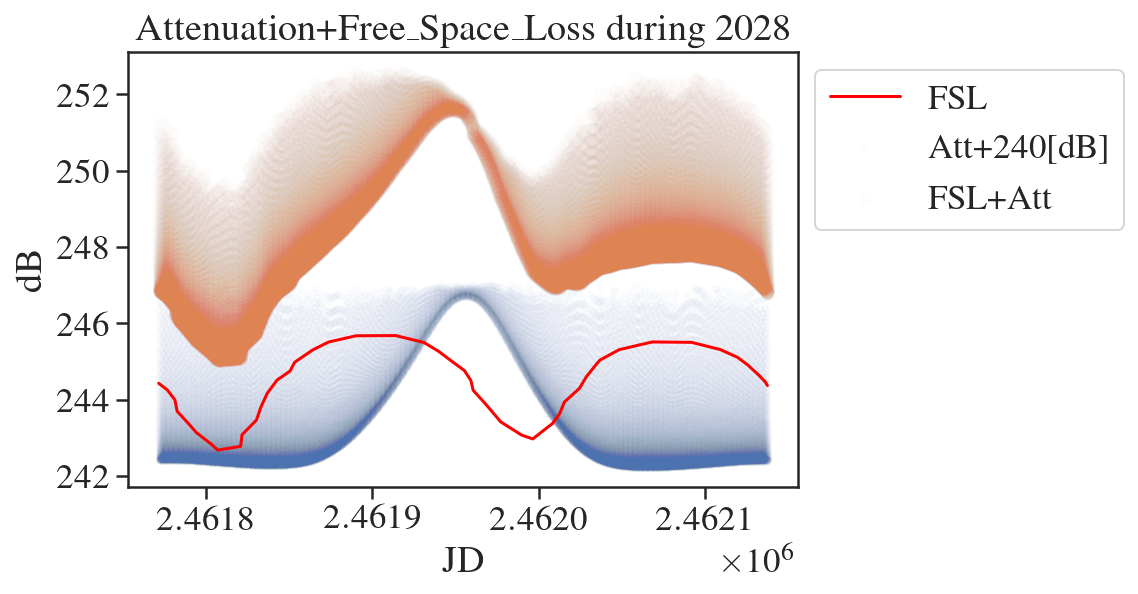

In [38]:
from scipy.interpolate import interp1d
FSLR_m = interp1d(RO.jd+2450000,FSL_r)
att_misasa_L2 = interp1d(FILE[0],Att2)
#plt.plot(FILE[0],att_misasa_L2(FILE[0]))
min_jd = np.min(Time(FILE[0],format="jd"))
max_jd = np.max(Time(FILE[0],format="jd"))
diff_jd = max_jd - min_jd
Range = np.linspace(np.min(FILE[0]),np.max(FILE[0]),100000)
start = Time("20%s-1-1 00:00:00"%(28))
end   = Time("20%s-1-1 00:00:00"%(29))
jds = np.linspace(start.to_value(format="jd"),end.to_value(format="jd"),100000)
FSL    = FSLR_m(jds)


plt.plot(jds,FSL,c="red")
plt.scatter(jds,att_misasa_L2(Range)+240,s=10,alpha=0.01)
plt.scatter(jds,FSL+att_misasa_L2(Range),alpha=0.01)
plt.legend(["FSL","Att+240[dB]","FSL+Att"],bbox_to_anchor=(1,1))
plt.ylabel("dB")
plt.xlabel("JD")
plt.title("Attenuation+Free_Space_Loss during 2028")
plt.show()

/Users/shotamiyazaki/.pyenv/versions/3.9.5/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


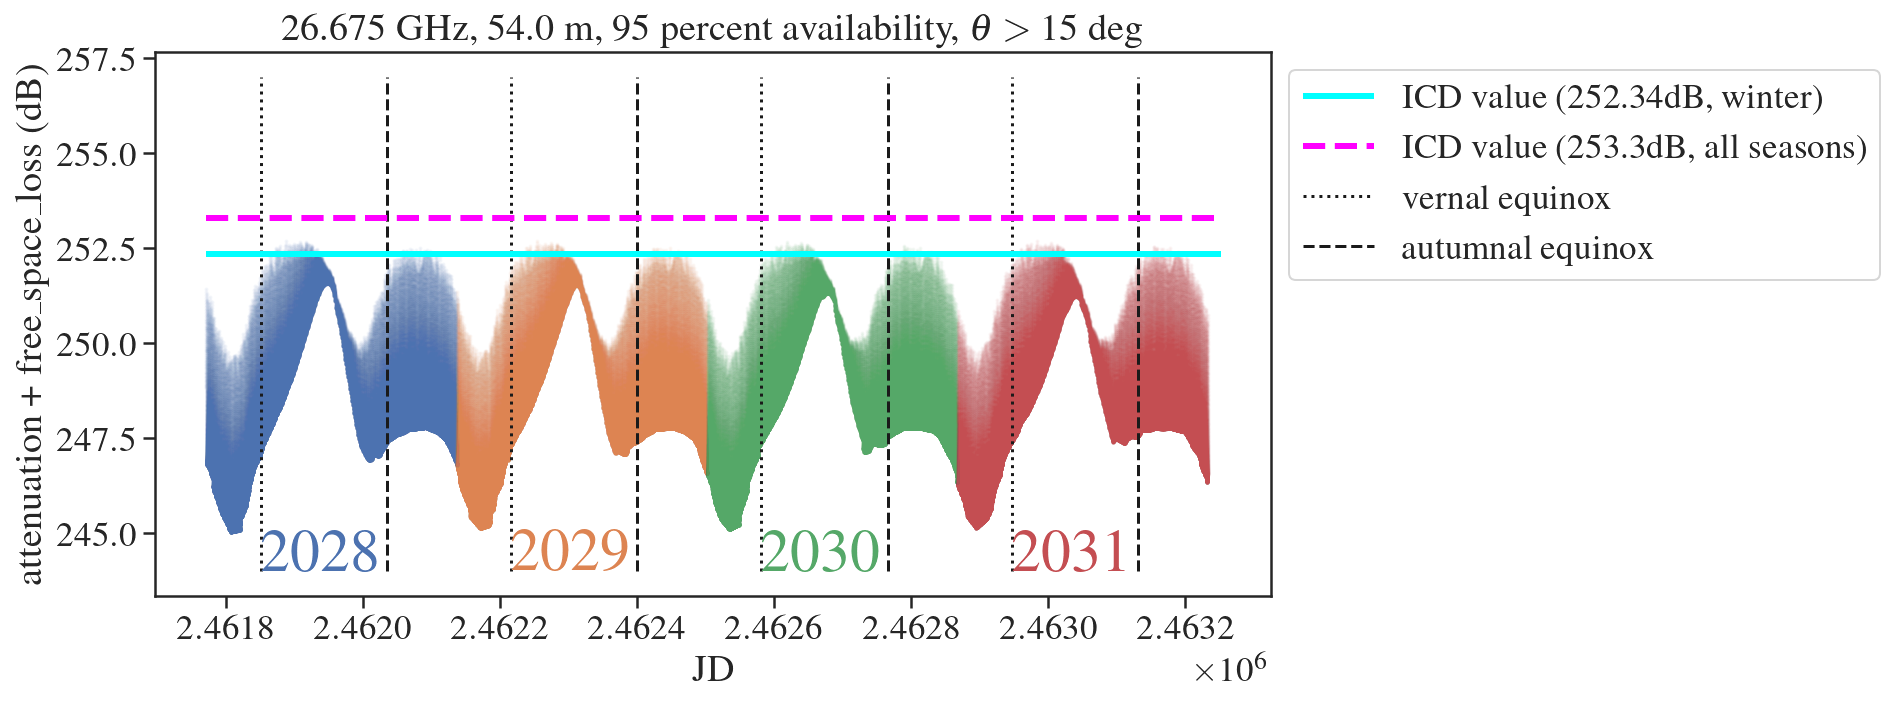

In [39]:
plt.figure(figsize=(10,5))
plt.hlines(252.34,2461771.5,2463251.5,zorder=3,color="cyan",ls="-",lw=3)
plt.hlines(253.3,2461771.5,2463251.5,zorder=3,color="magenta",ls="--",lw=3)
plt.vlines(Time("2028-03-21 00:00:00").to_value(format="jd"),244,257,color="k",ls=":")
plt.vlines(Time("2028-09-21 00:00:00").to_value(format="jd"),244,257,color="k",ls="--")
plt.vlines(Time("2029-03-21 00:00:00").to_value(format="jd"),244,257,color="k",ls=":")
plt.vlines(Time("2029-09-21 00:00:00").to_value(format="jd"),244,257,color="k",ls="--")
plt.vlines(Time("2030-03-21 00:00:00").to_value(format="jd"),244,257,color="k",ls=":")
plt.vlines(Time("2030-09-21 00:00:00").to_value(format="jd"),244,257,color="k",ls="--")
plt.vlines(Time("2031-03-21 00:00:00").to_value(format="jd"),244,257,color="k",ls=":")
plt.vlines(Time("2031-09-21 00:00:00").to_value(format="jd"),244,257,color="k",ls="--")
plt.legend(["ICD value (252.34dB, winter)","ICD value (253.3dB, all seasons)",
            "vernal equinox","autumnal equinox"],bbox_to_anchor=(1,1))
arr = []
for i in range(4):
    start = Time("20%s-1-1 00:00:00"%(28+i))
    end   = Time("20%s-1-1 00:00:00"%(29+i))
    jds = np.linspace(start.to_value(format="jd"),end.to_value(format="jd"),500000)
    FSL    = FSLR_m(jds)
    att    = att_misasa_L2(np.linspace(np.min(FILE[0]),np.max(FILE[0]),500000))
    att    = np.where(att>0,att,np.nan) 
    T_att = FSL+att
    arr.append(T_att)
    plt.scatter(jds,FSL+att,alpha=0.05,s=1)
plt.text(Time("2028-03-21 00:00:00").to_value(format="jd"),244,"2028",fontsize=30,color="C0")
plt.text(Time("2029-03-21 00:00:00").to_value(format="jd"),244,"2029",fontsize=30,color="C1")
plt.text(Time("2030-03-21 00:00:00").to_value(format="jd"),244,"2030",fontsize=30,color="C2")
plt.text(Time("2031-03-21 00:00:00").to_value(format="jd"),244,"2031",fontsize=30,color="C3")
plt.title("%s, %s, %s percent availability, $\\theta>15$ deg"%(f,D,100-p))
plt.xlabel("JD")
plt.ylabel("attenuation + free_space_loss (dB)")
plt.show()

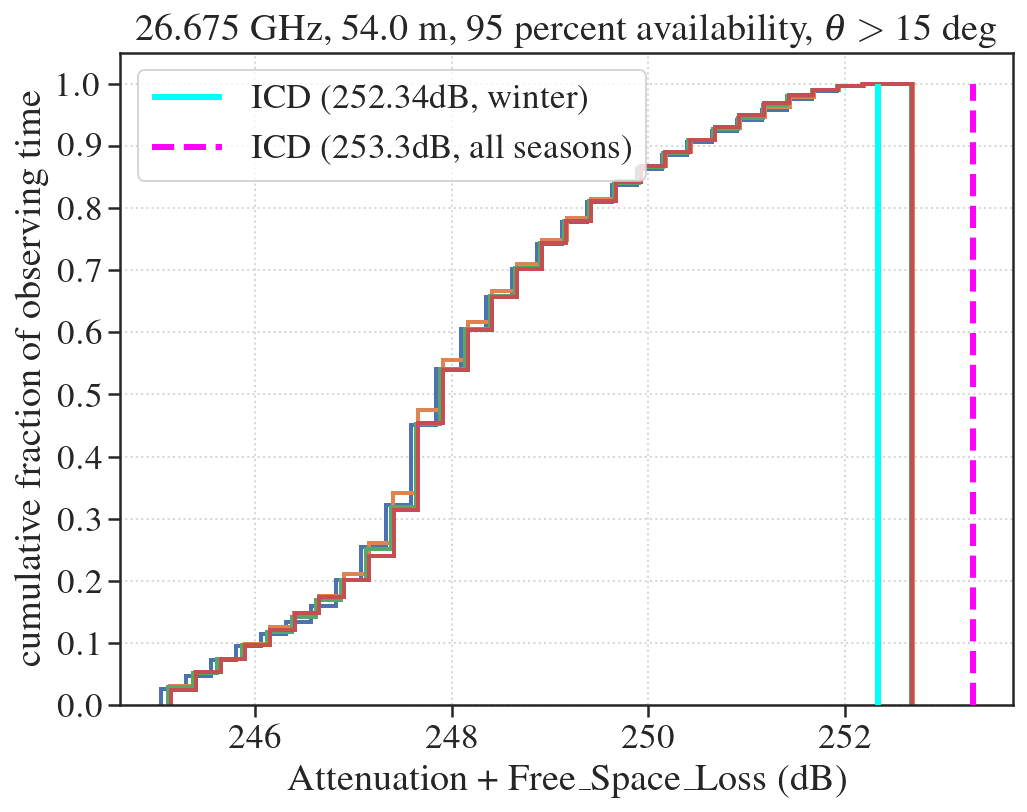

In [40]:
plt.figure(figsize=(8,6))
plt.title("%s, %s, %s percent availability, $\\theta>15$ deg"%(f,D,100-p))
plt.vlines(252.34,0,1,zorder=3,color="cyan",ls="-",lw=3)
plt.vlines(253.3,0,1,zorder=3,color="magenta",ls="--",lw=3)
plt.legend(["ICD (252.34dB, winter)","ICD (253.3dB, all seasons)"],loc="upper left")
plt.hist(arr[0],density=True,histtype="step",bins=30,lw=2,cumulative=True)
plt.hist(arr[1],density=True,histtype="step",bins=30,lw=2,cumulative=True)
plt.hist(arr[2],density=True,histtype="step",bins=30,lw=2,cumulative=True)
plt.hist(arr[3],density=True,histtype="step",bins=30,lw=2,cumulative=True)
plt.xlabel("Attenuation + Free_Space_Loss (dB)")
plt.ylabel("cumulative fraction of observing time")
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(which='major', linestyle=':',alpha=.8)

In [41]:
time_10deg = np.where(FILE[-1]>10,10,0)
sum_time_10deg = np.sum(time_10deg)/60/24 #day
time_15deg = np.where(FILE[-1]>15,10,0)
sum_time_15deg = np.sum(time_15deg)/60/24 #day
print("10deg time: %.2f [day], %.2f [hour], %.2f [min]"%(sum_time_10deg,sum_time_10deg*24,sum_time_10deg*24*60))
print("15deg time: %.2f [day], %.2f [hour], %.2f [min]"%(sum_time_15deg,sum_time_15deg*24,sum_time_15deg*24*60))

10deg time: 147.00 [day], 3528.00 [hour], 211680.00 [min]
15deg time: 129.82 [day], 3115.67 [hour], 186940.00 [min]
